## Лабораторная работа №2

Импортируем библиотеки

In [17]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets

Создаём Pandas DataFrame из файла IBM.csv

In [2]:
file_path = 'IBM.csv'
df = pd.read_csv(file_path)

Отрисуем график стоимости акций

In [3]:
fig1 = go.FigureWidget(layout_yaxis_range=[0,np.max(df['Close'])*1.1])
fig1.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode="lines+markers"
))
fig1.update_xaxes(title='Дата')
fig1.update_yaxes(title='Стоимость')
fig1

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '51939c69-1f9c-49a4-9def-62c03a1a7df8',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])}],
    'layout': {'template': '...',
               'xaxis': {'title': {'text': 'Дата'}},
               'yaxis': {'range': [0, 165.6270077], 'title': {'text': 'Стоимость'}}}
})

### Сглаживание: Скользящее среднее

In [4]:
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    full_data = np.pad(data, (window_size, ), 'edge')
    return np.convolve(full_data, weights, 'valid')

In [5]:
trace1 = go.Scatter(x=df['Date'], y=df['Close'], mode="lines+markers", name='Исходные данные')
window_size = 2
rolling_mean = moving_average(df['Close'], window_size)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Скользящее среднее {window_size}')
fig2 = go.FigureWidget(data=[trace1,trace2])
fig2.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def response(x):
    window_size = int(x)
    rolling_mean = moving_average(df['Close'], window_size)
    fig2["data"][1].y = rolling_mean
    fig2["data"][1].name = f'Скользящее среднее {window_size}'
    

interact(response, x=widgets.IntSlider(min=2, max=len(df['Date']), step=1, value=2))
fig2

interactive(children=(IntSlider(value=2, description='x', max=250, min=2), Output()), _dom_classes=('widget-in…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': '3c9c49c8-5245-4e50-b4e8-e68ae9eb5e64',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Скользящее среднее 2',
              'type': 'scatter',
              'uid': '98a857c5-6f8f-4747-9f52-be61f95f66cb',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003 , 127.730003 , 127.015003 , ..., 146.6700055, 145.990005 ,
                          145.990005 ])}],
    'layout': {'template': '...', 'xaxis': {'ti

### Сглаживание: Экспоненциальное скользящее среднее

In [6]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[i - 1])
    return ema

In [7]:
alpha = 0
rolling_mean = exponential_moving_average(df['Close'], alpha)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'EMA {alpha}')
fig3 = go.FigureWidget(data=[trace1,trace2])
fig3.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def response(x):
    alpha = x
    rolling_mean = exponential_moving_average(df['Close'], alpha)
    fig3["data"][1].y = rolling_mean
    fig3["data"][1].name = f'EMA {alpha}'

interact(response, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0))
fig3

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': 'bf675880-a91c-44ca-b083-770c21199b42',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'EMA 0.0',
              'type': 'scatter',
              'uid': '1b8fb236-3406-46d3-b6ea-1997c47c6764',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [127.730003, 127.730003, 127.730003, ..., 127.730003,
                    127.730003, 127.730003]}],
    'layout': {'template': '...', 'xaxis': {'title': {'text': 'Дата'}}, 'yaxis'

### Сглаживание: Метод Хольта

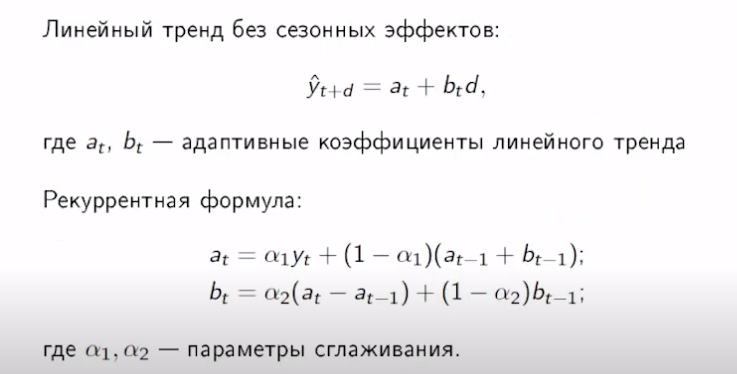

In [8]:
def holt_smoothing(data, alpha, beta):
    n = len(data)
    a = [data[0]] # level
    b = [data[1] - data[0]] # trend
    smoothed = [data[0]]

    for i in range(1, n):
        a.append(alpha * data[i] + (1 - alpha) * (a[i-1] + b[i-1]))
        b.append(beta * (a[i] - a[i-1]) + (1 - beta) * b[i-1])
        smoothed.append(a[i] + b[i])

    return smoothed

In [9]:
alpha = 0
beta = 0
rolling_mean = holt_smoothing(df['Close'], alpha, beta)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Holt {alpha}')
fig4 = go.FigureWidget(data=[trace1,trace2])
fig4.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def redraw():
    rolling_mean = holt_smoothing(df['Close'], alpha, beta)
    fig4["data"][1].y = rolling_mean
    fig4["data"][1].name = f'Holt alpha = {alpha}, beta = {beta}'

def response(a, b):
    global alpha, beta
    alpha, beta = a,b
    redraw()
    
a = widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description="alpha")
b = widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description="beta")
interact(response, a=a, b=b)
fig4

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=0.0, description…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': '35155f3a-b2a7-40b6-924a-c1ad2d068ab6',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Holt alpha = 0.0, beta = 0.0',
              'type': 'scatter',
              'uid': '9dd30aff-6671-4de8-a98b-cba662c1a374',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [127.730003, 124.87000300000001, 123.44000300000002, ...,
                    -226.90999699999912, -228.33999699999913, -229.76999699999914]}],
    'layout': {

### Сглаживание: Метод Хольта

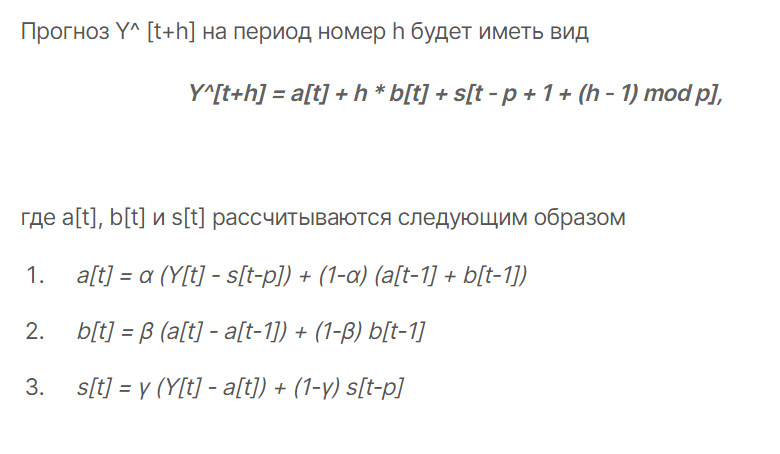

In [10]:
def holt_winters_smoothing(data, alpha, beta, gamma, seasonal_period):
    #full_data = np.pad(data, (seasonal_period, 0), 'edge')
    n = len(data)
    a = [data[seasonal_period]]
    b = [data[seasonal_period + 1] - data[seasonal_period]]
    s = list(data[:seasonal_period])
    smoothed = [data[seasonal_period]]
    
    for i in range(seasonal_period + 1, n):
        a.append(alpha * (data[i] - s[i - seasonal_period]) + (1 - alpha) * (a[i - 1 - seasonal_period] + b[i - 1 - seasonal_period]))
        b.append(beta * (a[i - seasonal_period] - a[i - 1 - seasonal_period]) + (1 - beta) * b[i - 1 - seasonal_period])
        s.append(gamma * (data[i] - a[i - seasonal_period]) + (1 - gamma) * s[i - seasonal_period])
        smoothed.append(a[i - seasonal_period] + b[i - seasonal_period] + s[i + 1 - seasonal_period])
    
    return smoothed

In [ ]:
alpha = 0
beta = 0
gamma = 0
seasonal_period = 2
rolling_mean = holt_winters_smoothing(df['Close'], alpha, beta, gamma, seasonal_period)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Holt Winters {alpha}')
fig5 = go.FigureWidget(data=[trace1,trace2])
fig5.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def redraw():
    rolling_mean = holt_winters_smoothing(df['Close'], alpha, beta, gamma, seasonal_period)
    fig5["data"][1].x = df['Date'][seasonal_period:]
    fig5["data"][1].y = rolling_mean
    fig5["data"][1].name = f'Holt Winters a = {alpha}, b = {beta}, g = {gamma}, sp = {seasonal_period}'

def response(a, b, g, s):
    global alpha, beta, gamma, seasonal_period
    alpha, beta, gamma, seasonal_period = a,b,g,s
    redraw()
    
a = widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description="alpha")
b = widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description="beta")
g = widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description="gamma")
s = widgets.IntSlider(min=2, max=len(df['Date']), step=1, value=0, description="seasonal_period")
interact(response, a=a, b=b, g=g, s=s)
fig5

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=0.0, description…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': '178e4231-78ac-4a6b-b7eb-c7c8664f0975',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Holt Winters a = 0.0, b = 0.0, g = 0.0, sp = 2',
              'type': 'scatter',
              'uid': '17ae35dd-4973-4efd-beab-03b113c5407b',
              'x': array(['2022-09-21', '2022-09-22', '2022-09-23', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [124.93, 251.98999899999998, 252.36999699999996, ...,
                    344.709511, 345.089509, 345.469507]}],
    'layout': {'template': '

### Выпрямление: Энергия

In [12]:
def energy(data, delta):
    n = len(data)
    res = []
    for i in range(n):
        left_offset = delta - i if i < delta else 0
        right_offset = delta - (n - i) + 1 if i >= n - delta else 0
        arr = np.array(data[i-delta+left_offset:i+delta-right_offset+1])
        mean = arr.mean()
        res.append(((np.array(data[i-delta+left_offset:i+delta-right_offset+1]) - mean) ** 2).sum()/(2*delta+1-right_offset-left_offset))
    return res

In [14]:
delta = 2
energy_value = energy(df['Close'], delta)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Energy {delta}')
fig6 = go.FigureWidget(data=[trace1,trace2])
fig6.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def redraw(delta):
    energy_value = energy(df['Close'], delta)
    fig6["data"][1].y = energy_value
    fig6["data"][1].name = f'Energy {delta}'
    
delta = widgets.IntSlider(min=1, max=len(df['Date']), step=1, value=1, description="delta")
interact(redraw, delta=delta)
fig6

interactive(children=(IntSlider(value=1, description='delta', max=250, min=1), Output()), _dom_classes=('widge…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': 'c676187b-20ca-45ee-863a-599f4cb7480b',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Energy 1',
              'type': 'scatter',
              'uid': '03b87d91-0fd8-4bf8-8139-ba17f7c93a3f',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [0.5112249999999947, 1.3068694466686568, 0.33349073333755586,
                    ..., 0.20055678889089043, 0.31146725333489383,
                    0.4624006800002576]}],
    'la

### Выпрямление: Длина

In [22]:
def length(data, delta):
    n = len(data)
    res = []
    for i in range(n):
        left_offset = delta - i if i < delta else 0
        right_offset = delta - (n - i) + 1 if i >= n - delta else 0
        arr = np.array(data[i-delta+left_offset:i+delta-right_offset+1])
        mean = arr.mean()
        res.append((abs(np.array(data[i-delta+left_offset:i+delta-right_offset+1]) - mean)).sum()/(2*delta+1-right_offset-left_offset))
    return res

In [23]:
delta = 2
length_value = length(df['Close'], delta)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Length {delta}')
fig7 = go.FigureWidget(data=[trace1,trace2])
fig7.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def redraw(delta):
    length_value = length(df['Close'], delta)
    fig7["data"][1].y = length_value
    fig7["data"][1].name = f'Length {delta}'
    
delta = widgets.IntSlider(min=1, max=len(df['Date']), step=1, value=1, description="delta")
interact(redraw, delta=delta)
fig7

interactive(children=(IntSlider(value=1, description='delta', max=250, min=1), Output()), _dom_classes=('widge…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': 'a538392d-dfc0-4cb1-8723-2b6031791db7',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Length 1',
              'type': 'scatter',
              'uid': '41358342-b419-4996-82e3-c111423700f7',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [0.7149999999999963, 0.9400006666666627, 0.5244462222222239,
                    ..., 0.4111124444444461, 0.48000088888889536,
                    0.6800005000000056]}],
    'layo

### Выпрямление: Осцилляция